# Principal Component Analysis

It is a dimensionality-reduction technique. It is usually used to reduce the number of features to 2 for visualization and for feature extraction

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

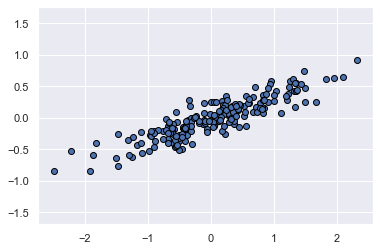

In [7]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], edgecolors='black', linewidths=1)
plt.axis('equal')

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [10]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

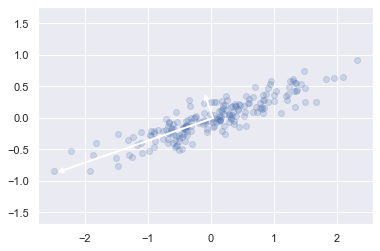

In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, 
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')

The vectors are the *principal axes* of the data and the length represents how important they are in terms of the distribution of the data.
The transformation from data axes to principal axes is also known as affine transformation which basically means it is composed of a translation, rotatin & uniform scaling

### PCA for dimensionality reduction

In [15]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Original shape: ", X.shape)
print("Transformed shape: ", X_pca.shape)

Original shape:  (200, 2)
Transformed shape:  (200, 1)


(-2.77152878069022, 2.661757596590676, -0.9964674432667124, 1.0219081775900811)

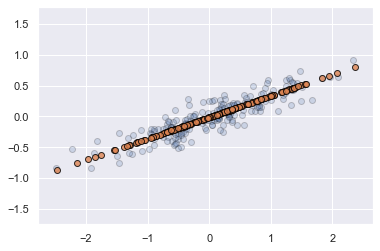

In [18]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2,
           linewidth=1, edgecolors='black')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, 
            linewidth=1, edgecolors='black')
plt.axis('equal')

This is what a PCA dimensionality reduction does. It reduces information along the least important principal axes and leaves only the component of the data with the highest variance. Even though, there is some loss in information, it is good enough to encode the most important relationships

### PCA for visualization

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [20]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


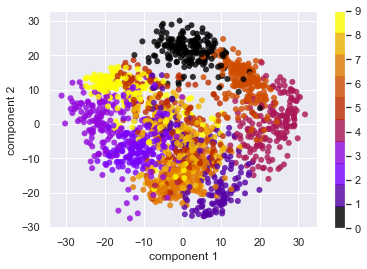

In [27]:
plt.scatter(projected[:, 0], projected[:, 1],
           c=digits.target, edgecolors='none', alpha=0.8,
           cmap=plt.cm.get_cmap('gnuplot', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

### Choosing the number of components

Text(0, 0.5, 'cumulative explained variance')

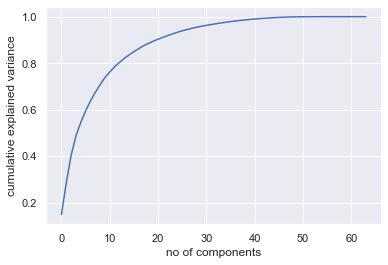

In [28]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')

The above curve shows the explained variance changes with respect to the number of components(after PCA)

### PCA for Noise filtering

PCA can be used to filter out noise by transforming the data from a higher dimenstion to a lower dimension which might also end up reducing much of the noise in the data as it only preserves the features that are  the most *variant* and creates nre features using these variations.

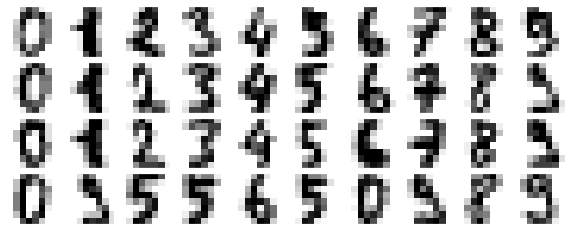

In [29]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks': [], 'yticks': []},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
        
plot_digits(digits.data)

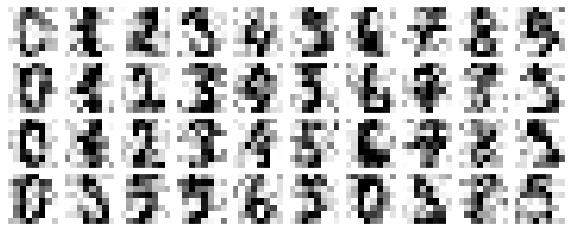

In [30]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [31]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

In [33]:
pca.transform(noisy)

array([[ -9.82613291,  19.60311879,  -3.49445446, ...,   7.26107832,
          0.58419145,   1.8438046 ],
       [ 14.65827166, -15.58079811,  11.61685625, ...,   5.96816258,
          1.69008628,  -7.38319027],
       [  5.30646513, -14.73205492,   0.26421735, ...,  -4.26313868,
         -2.47186264,  -7.46461662],
       ...,
       [  7.71966027,  -6.95777476,  -6.08565658, ..., -10.8659198 ,
          5.73479747,   5.54420925],
       [ -8.91737494,  11.35437432, -11.91713483, ..., -11.08482921,
          3.23292014,   0.46439398],
       [ -6.88599972,   3.56177468,  14.54014659, ..., -12.42281561,
          0.88588017,  10.20443299]])

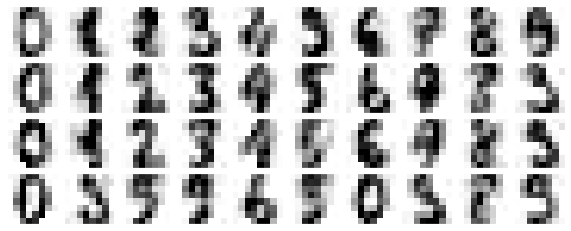

In [32]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Eigenfaces example

In [34]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [35]:
pca = PCA(svd_solver='randomized', n_components=150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

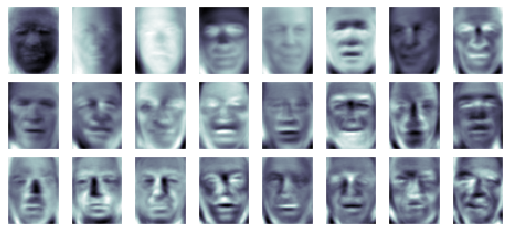

In [36]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

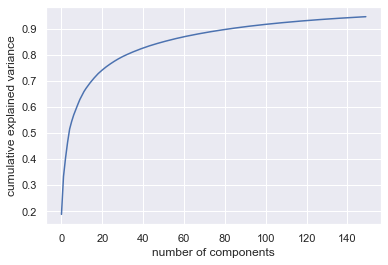

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Using 150 components captures about 90% of the variance, the following images show how much variance the image is able to capture. It acts as a comparison between the reconstrcuted image and the original

In [38]:
pca = PCA(svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstructed')

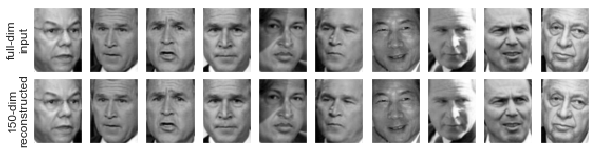

In [42]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks': [], 'yticks': []},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62,47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstructed')

### Reference:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html